In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test1.csv")

In [65]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [66]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
#training labels
# Training labels
labels = train['label'].values


In [7]:
#Viewing unique labels
unique_values = np.array(labels)
np.unique(unique_values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

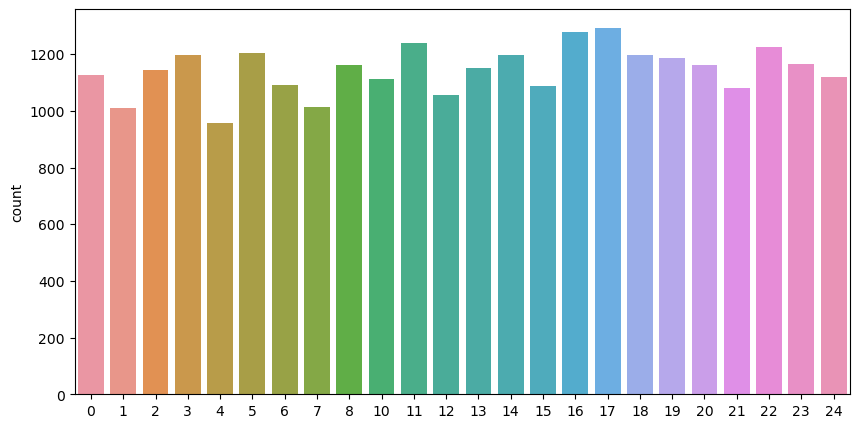

In [8]:
#plotting quantities in each class
plt.figure(figsize=(10,5))
sns.countplot(x = labels)

In [9]:
#dropping training labels to separate it
train.drop('label', axis = 1, inplace = True)

In [10]:
#Extracting image data from each rows
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [11]:
#encode one of the labels
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [12]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


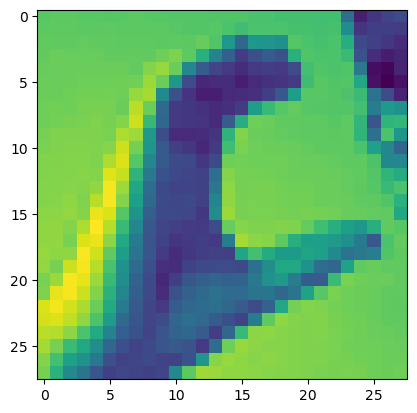

In [13]:
#inspect the image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [35]:
import numpy as np
import os
import cv2
import random

In [29]:
for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Sample image", sample)
    cv2.waitKey(0)  # Corrected function call
    cv2.destroyAllWindows()

In [27]:
#Split the data into X_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [20]:
#Start loading tensorflow and define batch size
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [21]:
#Scale the images
x_train = x_train / 255
x_test = x_test / 255

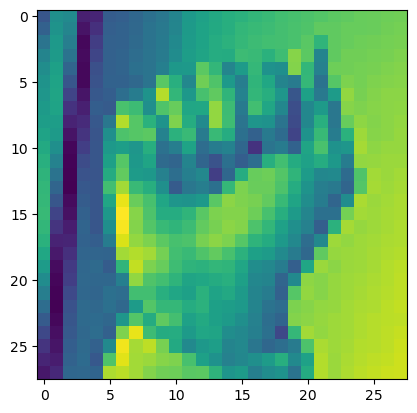

In [22]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [36]:
#creating CNN model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

In [24]:
# Compile our model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [30]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,912 (335.59 KB)

 Trainable params: 85,912 (335.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [45]:
#Train the mod
#Train the model
# Reshape the input data to match the model's input shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 133ms/step - accuracy: 0.0766 - loss: 4.5846 - val_accuracy: 0.2449 - val_loss: 2.4396
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.2690 - loss: 2.3221 - val_accuracy: 0.4582 - val_loss: 1.6385
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.4798 - loss: 1.5652 - val_accuracy: 0.7272 - val_loss: 0.7844
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.7540 - loss: 0.7018 - val_accuracy: 0.8901 - val_loss: 0.3210
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 123ms/step - accuracy: 0.8909 - loss: 0.3292 - val_accuracy: 0.9486 - val_loss: 0.1644
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.9426 - loss: 0.1722 - val_accuracy: 0.9848 - val_loss: 0.0573
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9735 - loss: 0.0896 - val_accuracy: 0.9954 - val_loss: 0.0223
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9840 - loss: 0

C:\Users\jagad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.1846 - loss: 2.7736 - val_accuracy: 0.7610 - val_loss: 0.9061
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6692 - loss: 1.0458 - val_accuracy: 0.9053 - val_loss: 0.3894
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - accuracy: 0.8053 - loss: 0.5941 - val_accuracy: 0.9665 - val_loss: 0.1980
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.8780 - loss: 0.3697 - val_accuracy: 0.9853 - val_loss: 0.0936
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9244 - loss: 0.2393 - val_accuracy: 0.9958 - val_loss: 0.0503
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.9471 - loss: 0.1689 - val_accuracy: 0.9995 - val_loss: 0.0257
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9629 - loss: 0.1254 - val_accuracy: 0.9998 - val_loss: 0.0124
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.9725 - loss: 0.0959 - v

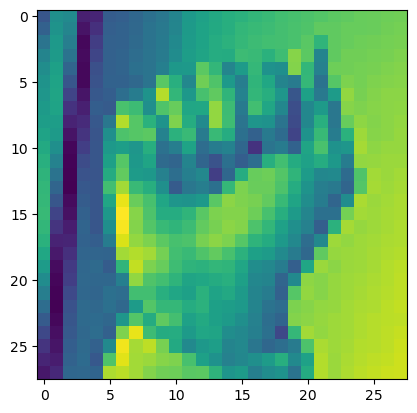

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset (images and labels) into variables 'images' and 'labels'

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

# Reshape the input data to match the model's input shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Scale the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# Display an example image from the training set
plt.imshow(x_train[0].reshape(28, 28))
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset (images and labels) into variables 'images' and 'labels'

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

# Reshape the input data to match the model's input shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Scale the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

# Display an example image from the training set
plt.imshow(x_train[0].reshape(28, 28))
plt.show()


In [59]:
print(test.columns)


Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)


In [46]:
#Save the model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


In [47]:
# Save the model in the native Keras format
model.save('my_model.keras')


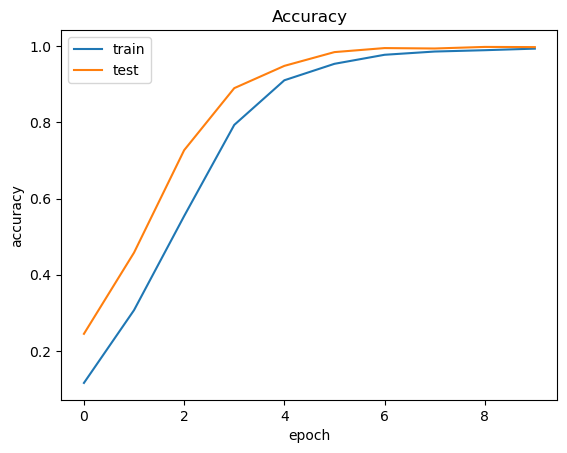

In [48]:
#Printing the Training History Graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'test'])
plt.show()

In [67]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)




In [68]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

(7172, 28, 28, 1)

In [69]:
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [70]:
# Accuracy score
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(test_labels, y_pred.round())
print("Accuracy:", accuracy)

Accuracy: 0.8729782487451199


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Assume the label binarizer object is defined as 'label_binarizer'
label_binarizer = LabelBinarizer()

# Use the label binarizer to transform test labels
test_labels = label_binarizer.fit_transform(test_labels)


In [82]:
#Create function to watch label to letter
def getletter(result):
    classLabels = { 0:  'hold',
                    1:  'B',
                    2:  'C',
                    3:  'D',
                    4:  'E',
                    5:  'F',
                    6:  'G',
                    7:  'H',
                    8:  'I',
                    9:  'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

TEST ON ACTUAL WEBCAM INPUT

In [ ]:
import cv2
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Define your model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for hand gestures
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (you should have training data)
# model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


In [ ]:
from tensorflow.keras.layers import Input

input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)
model = Sequential([
    inputs,
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    # Other layers...
])


In [84]:
import numpy as np
# Assuming 'model' is defined and initialized earlier in your code
import cv2

cap = cv2.VideoCapture(0)
counter = 0  # Counter to track the number of predictions made

while True:
    ret, frame = cap.read()
    # Define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
    
    roi = roi.reshape(1, 28, 28, 1)

    probabilities = model.predict(roi)
    result = str(np.argmax(probabilities))
    
    # Display the predicted letter
    letter = getletter(result)
    cv2.putText(copy, letter, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    # Increment counter after each prediction
    counter += 1
    
    if cv2.waitKey(1) & 0xFF == ord('q') or counter == 300:  # Exit if 'q' key pressed or 2 predictions made
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━